In [358]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# IMPORT LIBRARY

In [359]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

# FUNCTION

PLOT

In [360]:
def plot_func(point0, point1, point2, a, b, method):
    plt.figure(figsize=(20,8))
    plt.suptitle("Hierarchical Clustering", fontsize=18)

    plt.subplot(1,2,1)
    plt.title('DEFAULT')
    plt.xlabel(a)
    plt.ylabel(b)
    plt.plot(df[df['Species'] == 0][a], df[df['Species'] == 0][b], 'go', label='Iris-setosa')
    plt.plot(df[df['Species'] == 1][a], df[df['Species'] == 1][b], 'ro', label='Iris-versicolor')
    plt.plot(df[df['Species'] == 2][a], df[df['Species'] == 2][b], 'bo', label='Iris-virginica')
    plt.legend(loc='lower right')

    plt.subplot(1,2,2)
    plt.title("Agglomerative Clustering ('" + method + "' method)")
    plt.xlabel(a)
    plt.ylabel(b)
    plt.plot(point0[a], point0[b], 'co')
    plt.plot(point1[a], point1[b], 'yo')
    plt.plot(point2[a], point2[b], 'ko')

    plt.show()

In [361]:
def plot_func_kmeans(point0, point1, point2,  a, b):
    plt.figure(figsize=(20,8))
    plt.suptitle("K-MEANS CLUSTERING", fontsize=18)

    plt.subplot(1,2,1)
    plt.title('DEFAULT')
    plt.xlabel(a)
    plt.ylabel(b)
    plt.plot(df[df['Species'] == 0][a], df[df['Species'] == 0][b], 'go', label='Iris-setosa')
    plt.plot(df[df['Species'] == 1][a], df[df['Species'] == 1][b], 'ro', label='Iris-versicolor')
    plt.plot(df[df['Species'] == 2][a], df[df['Species'] == 2][b], 'bo', label='Iris-virginica')
    plt.legend(loc='lower right')

    plt.subplot(1,2,2)
    plt.title("K-Means Clustering")
    plt.xlabel(a)
    plt.ylabel(b)
    plt.plot(point0[a], point0[b], 'co')
    plt.plot(point1[a], point1[b], 'yo')
    plt.plot(point2[a], point2[b], 'ko')

    plt.show()

DENDROGRAM PLOT FUNCTION

In [362]:
def dend_plot_func(method):
    linkage_method = linkage(X, method)
    plt.figure(figsize=(30, 20))
    dendrogram(linkage_method)
    plt.xlabel('Index', fontsize=18)
    plt.ylabel('Distance', fontsize=18)
    plt.suptitle("DENDROGRAM " + method.upper() + " METHOD", fontsize=50)
    plt.show()

ACC

In [363]:
def acc(method, num_true, num_pred):
  d = 50
  true = list(df[df['Species'] == num_true]['Species'])
  pred = list(df[df['Species'] == num_true][method])
  count = 0
  for i in range(d):
    if (true[i] == num_true and pred[i] == num_pred):
        count = count + 1

  return count/d

# READ DATA

In [364]:
df = pd.read_csv('/content/drive/MyDrive/Iris.csv')
#df = pd.read_csv('Iris.csv')

In [365]:
label = []
for i in df.Species:
    if (i == 'Iris-setosa'):
        label.append(0)
    elif (i == 'Iris-versicolor'):
        label.append(1)
    else:
        label.append(2)

df['Species'] = label
#df = shuffle(df)
#df.reset_index(inplace=True)
df['ID'] = [i for i in range(150)]
df = df[['ID', 'PetalLengthCm', 'PetalWidthCm', 'Species']]
df

,ID,PetalLengthCm,PetalWidthCm,Species
0,0,1.4,0.2,0
1,1,1.4,0.2,0
2,2,1.3,0.2,0
3,3,1.5,0.2,0
4,4,1.4,0.2,0
...,...,...,...,...
145,145,5.2,2.3,2
146,146,5.0,1.9,2
147,147,5.2,2.0,2
148,148,5.4,2.3,2


# CLUSTERING

In [366]:
X = df.iloc[:, 1:5].values
y = df.iloc[:, 5:].values

In [367]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
pred_label = kmeans.predict(X)
df['clus_kmean'] = pred_label

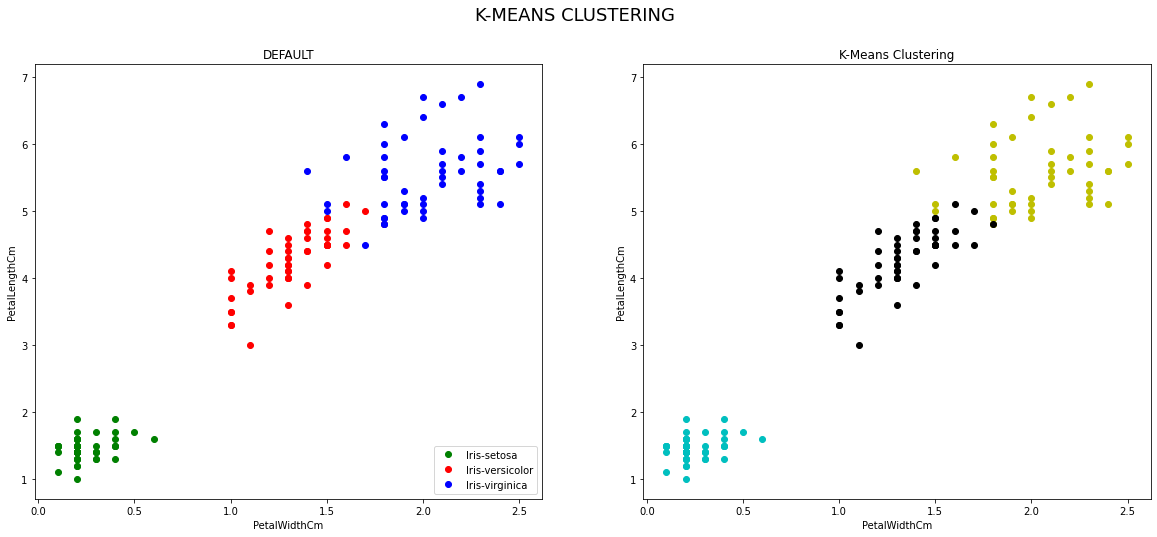

In [368]:
plot_func_kmeans(df[df['clus_kmean'] == 0], df[df['clus_kmean'] == 1], df[df['clus_kmean'] == 2], 'PetalWidthCm', 'PetalLengthCm')

In [369]:
print(acc('clus_kmean', 0, 0))
print(acc('clus_kmean', 1, 2))
print(acc('clus_kmean', 2, 1))
acc_avg = (acc('clus_kmean', 0, 0) + acc('clus_kmean', 1, 2) + acc('clus_kmean', 2, 1))/3
print('avg acc:', acc_avg)

1.0
1.0
0.98
avg acc: 0.9933333333333333


## 1. AGGLOMERATIVE CLUSTERING ('WARD' METHOD)

In [370]:
clustering0 = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward').fit(X)
clus0 = clustering0.labels_
df['hac_ward'] = clus0

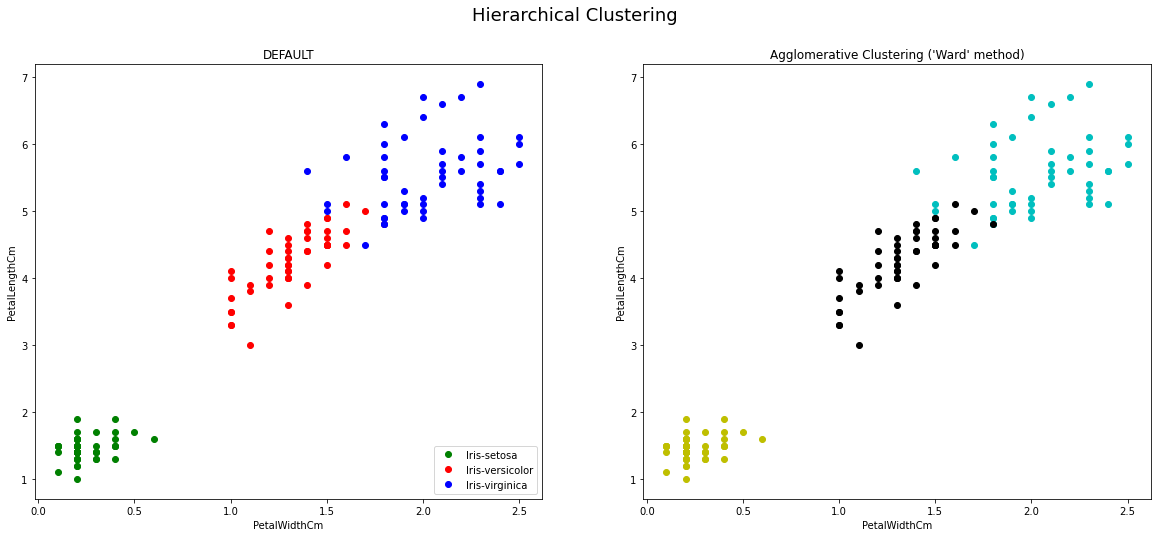

In [371]:
plot_func(df[df['hac_ward'] == 0], df[df['hac_ward'] == 1], df[df['hac_ward'] == 2], 'PetalWidthCm', 'PetalLengthCm', 'Ward')

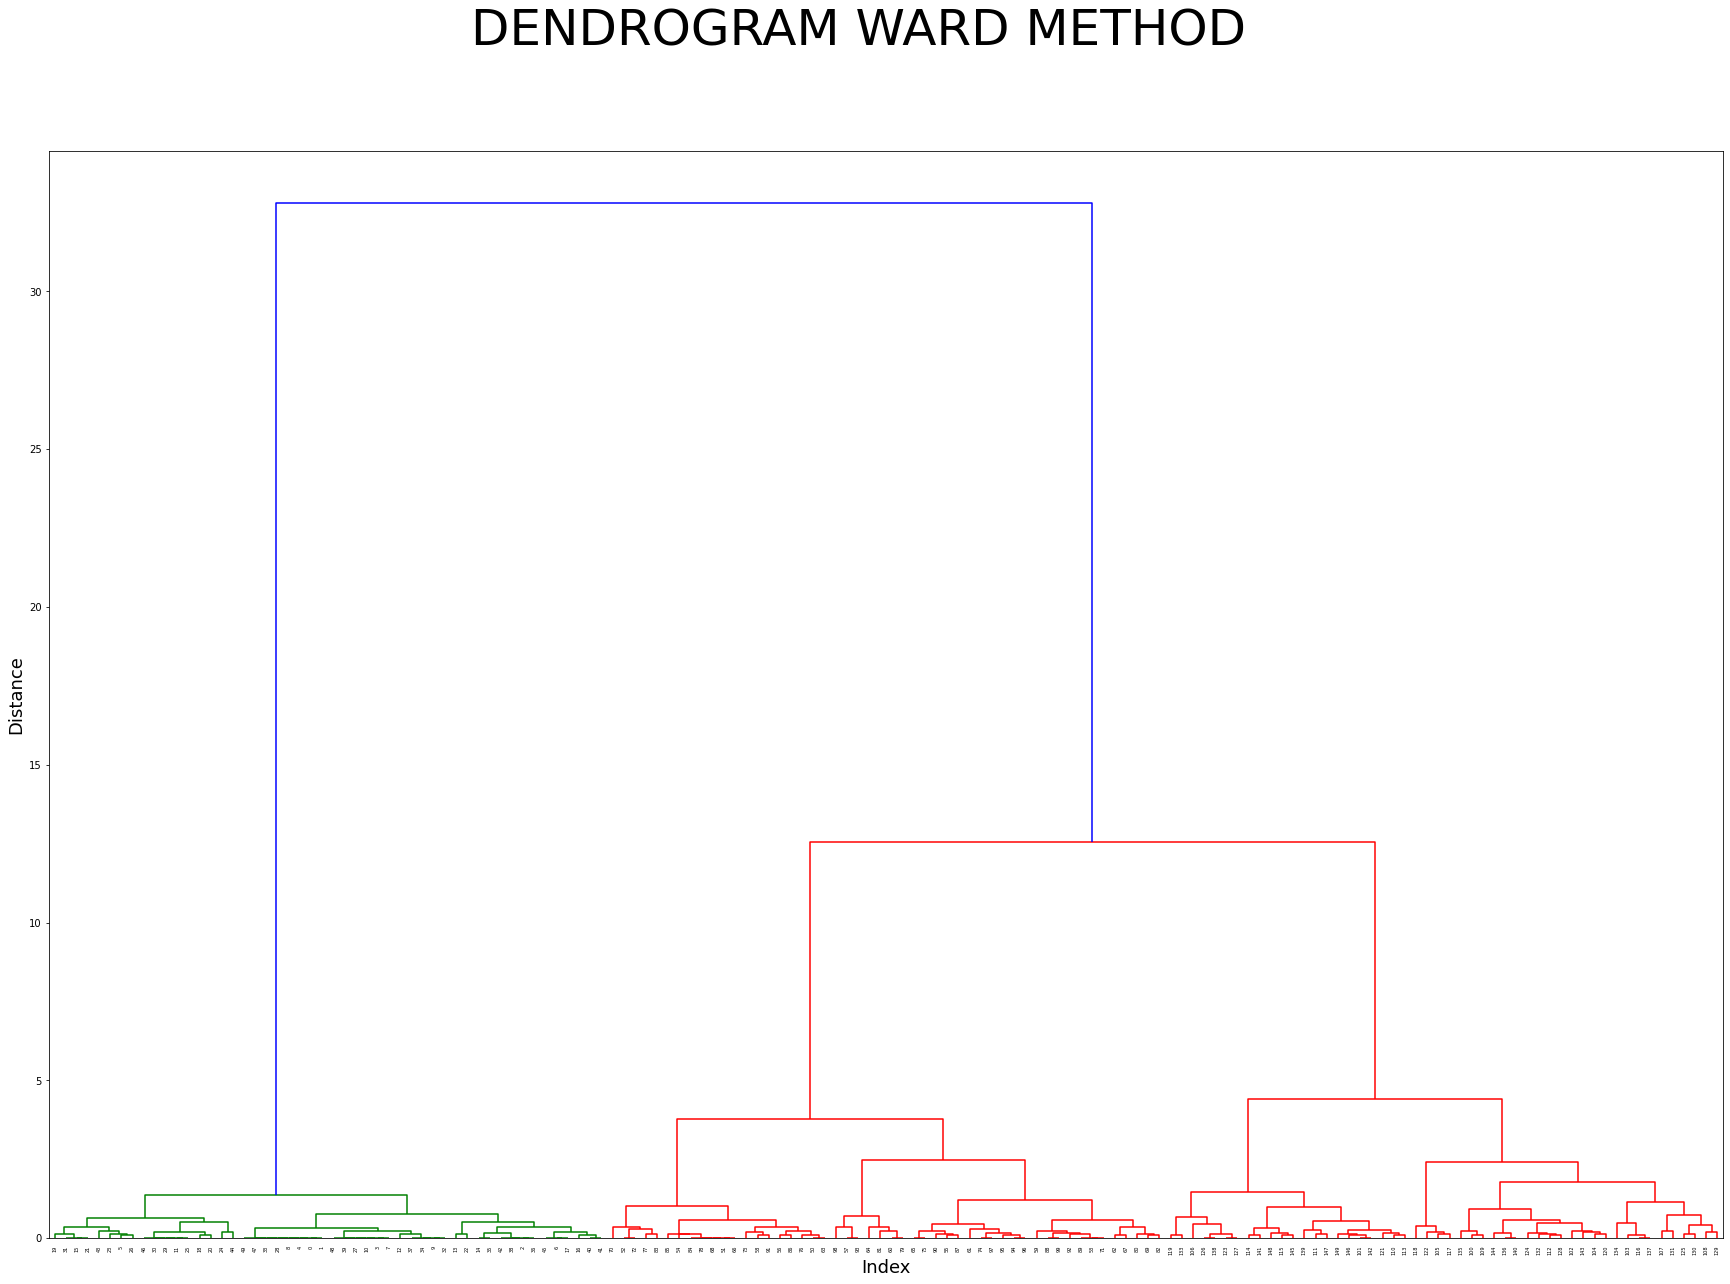

In [372]:
dend_plot_func("ward")

In [373]:
print(acc('hac_ward', 0, 1))
print(acc('hac_ward', 1, 2))
print(acc('hac_ward', 2, 0))
acc_avg = (acc('hac_ward', 0, 1) + acc('hac_ward', 1, 2) + acc('hac_ward', 2, 0))/3
print('avg acc:', acc_avg)

1.0
1.0
1.0
avg acc: 1.0


## 2. AGGLOMERATIVE CLUSTERING ('SINGLE' METHOD)

---



In [374]:
clustering1 = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='single').fit(X)
clus1 = clustering1.labels_
df['hac_single'] = clus1

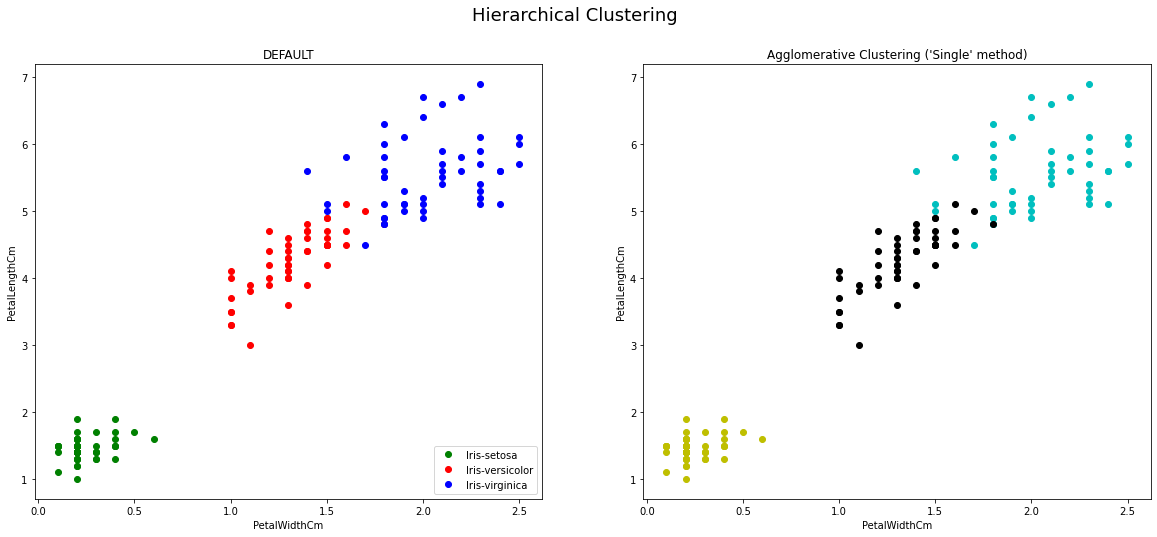

In [375]:
plot_func(df[df['hac_single'] == 0], df[df['hac_single'] == 1], df[df['hac_single'] == 2], 'PetalWidthCm', 'PetalLengthCm', 'Single')

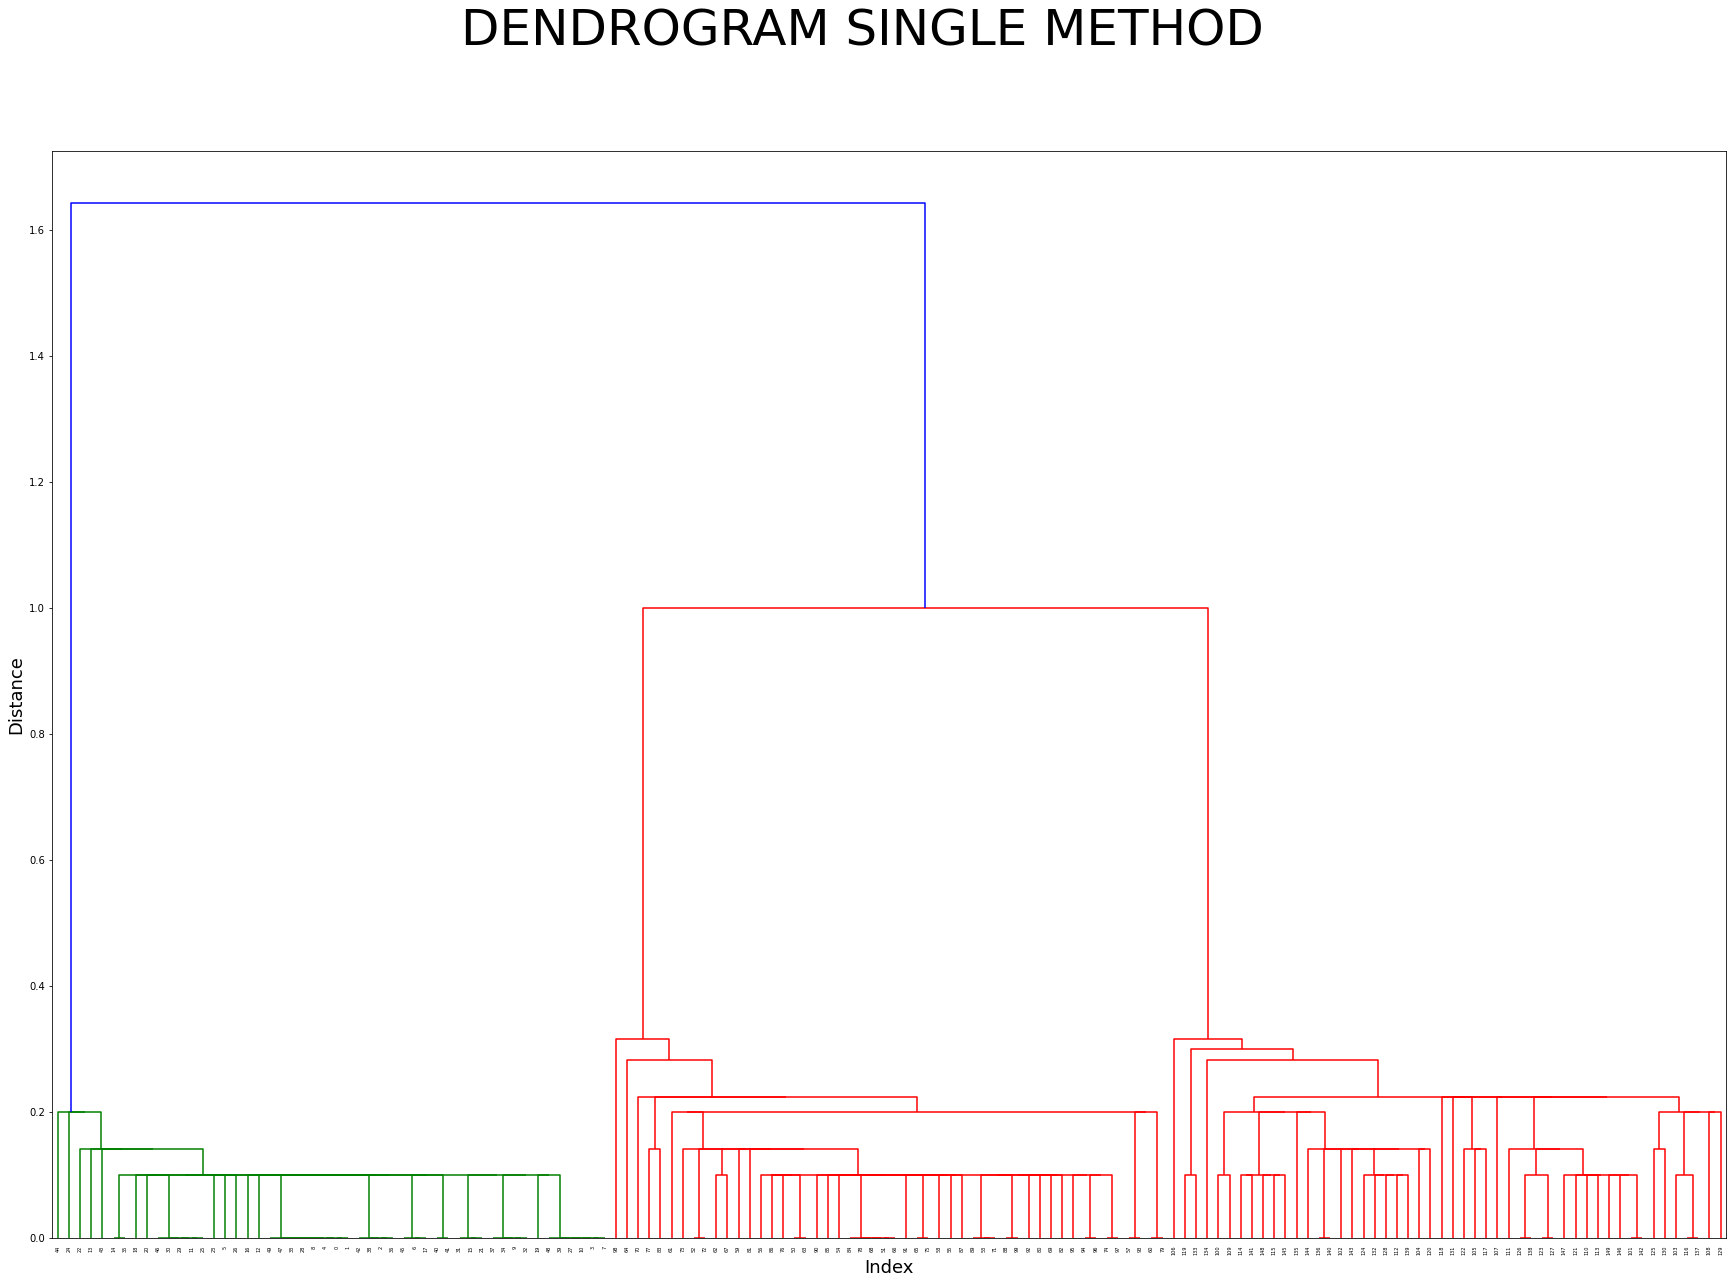

In [376]:
dend_plot_func("single")

In [377]:
print(acc('hac_single', 0, 1))
print(acc('hac_single', 1, 2))
print(acc('hac_single', 2, 0))
acc_avg = (acc('hac_single', 0, 1) + acc('hac_single', 1, 2) + acc('hac_single', 2, 0))/3
print('avg acc:', acc_avg)

1.0
1.0
1.0
avg acc: 1.0


## 3. AGGLOMERATIVE CLUSTERING ('COMPLETE' METHOD)

In [378]:
clustering2 = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete').fit(X)
clus2 = clustering2.labels_
df['hac_complete'] = clus2

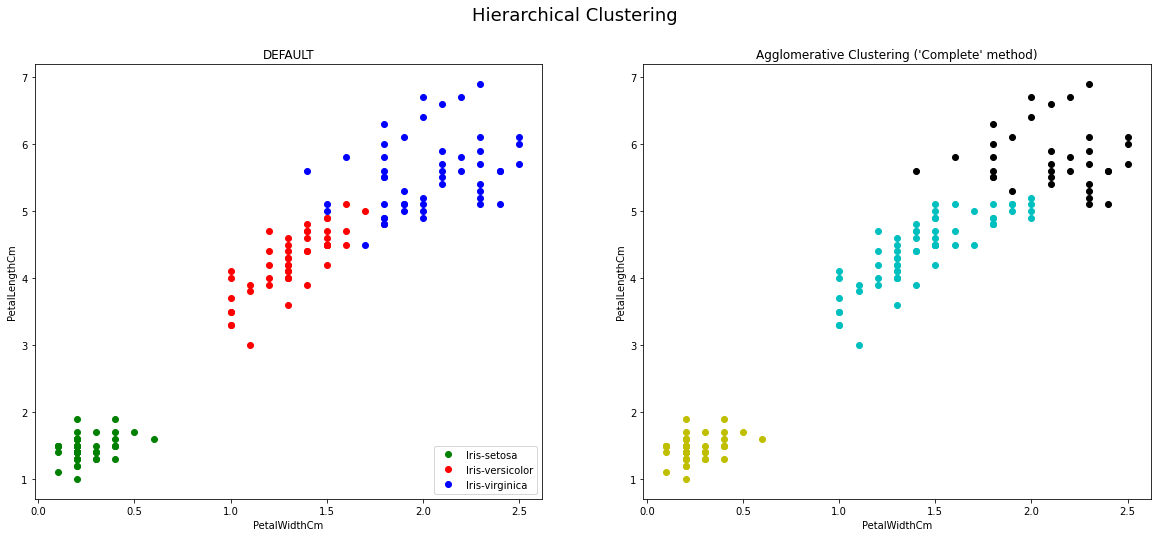

In [379]:
plot_func(df[df['hac_complete'] == 0], df[df['hac_complete'] == 1], df[df['hac_complete'] == 2], 'PetalWidthCm', 'PetalLengthCm', 'Complete')

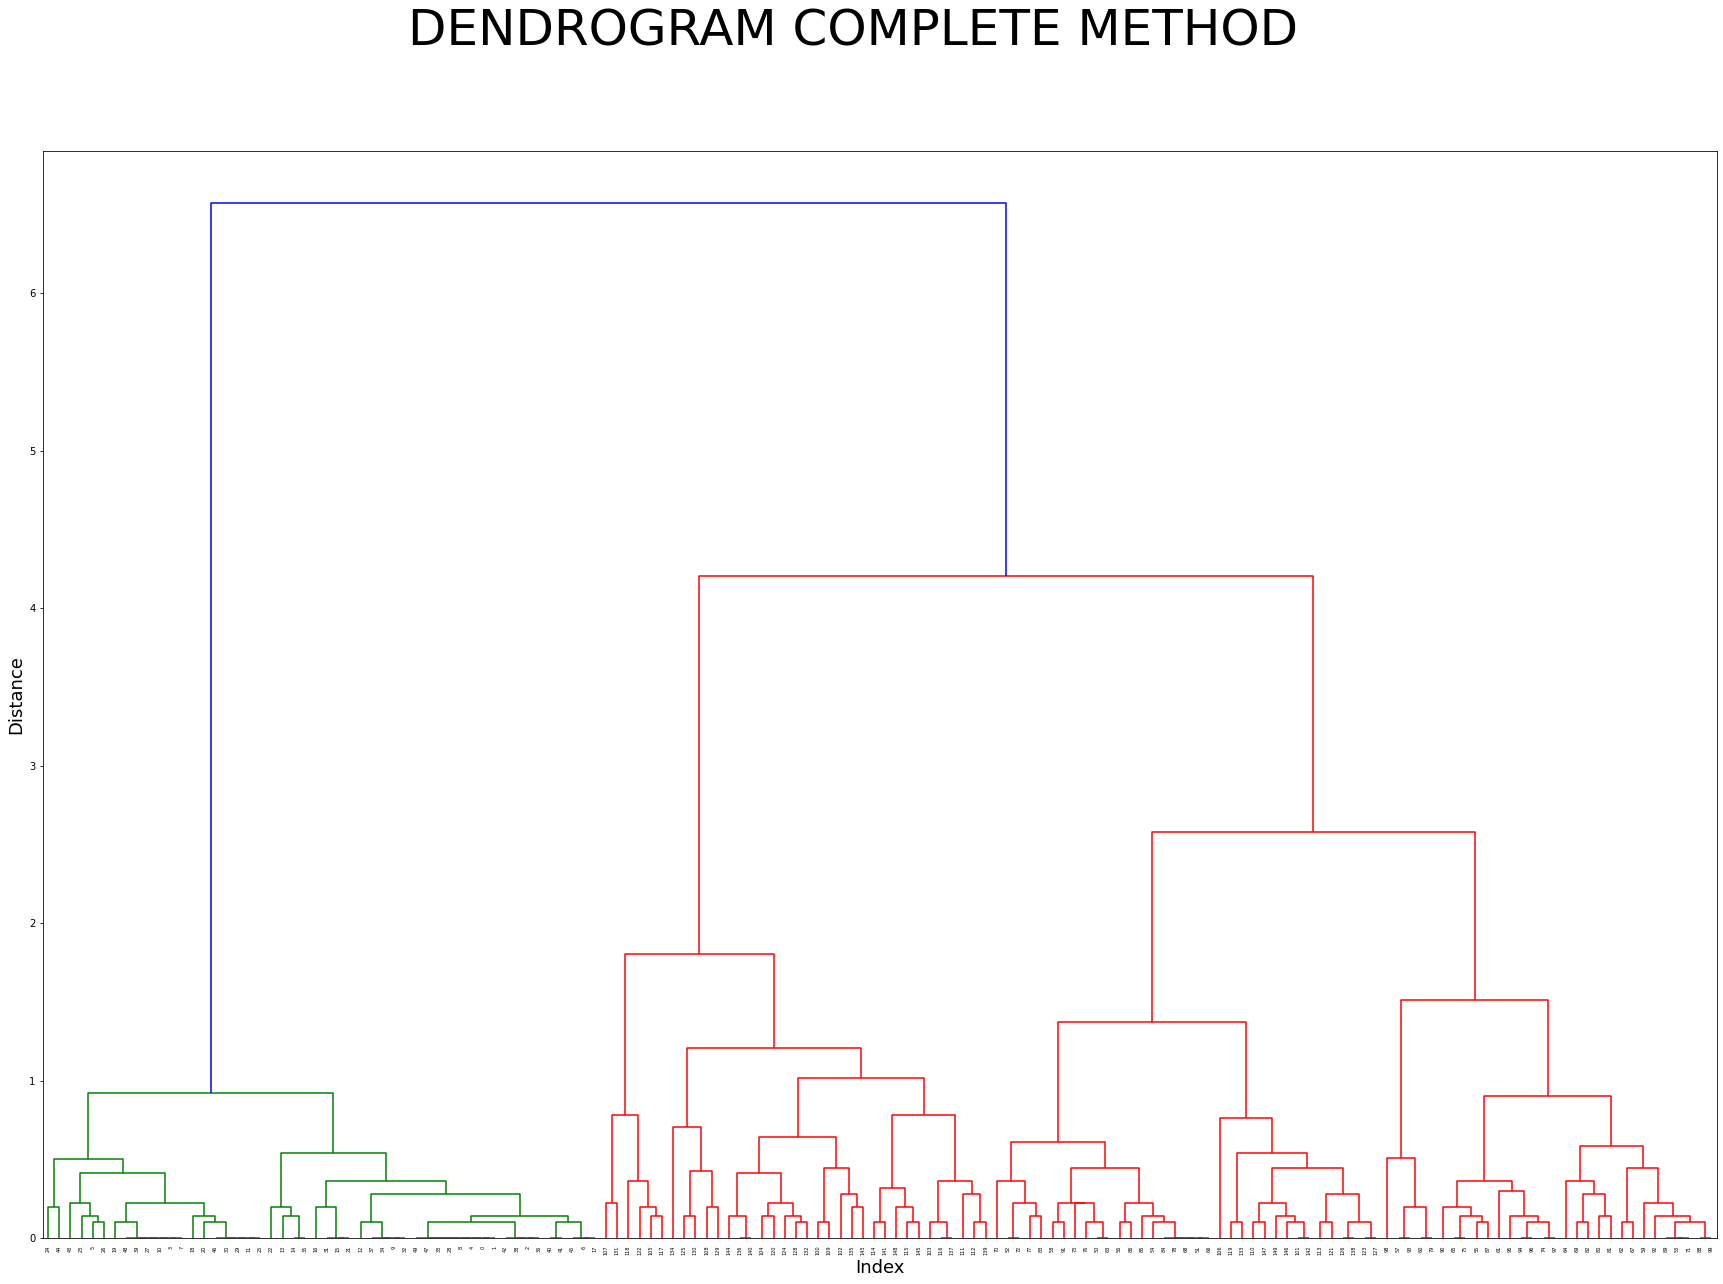

In [380]:
dend_plot_func("complete")

In [381]:
print(acc('hac_complete', 0, 1))
print(acc('hac_complete', 1, 0))
print(acc('hac_complete', 2, 2))
acc_avg = (acc('hac_complete', 0, 1) + acc('hac_complete', 1, 0) + acc('hac_complete', 2, 2))/3
print('avg acc:', acc_avg)

1.0
1.0
0.7
avg acc: 0.9


## 4. AGGLOMERATIVE CLUSTERING ('AVERAGE' METHOD)

In [382]:
clustering3 = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='average').fit(X)
clus3 = clustering3.labels_
df['hac_avg'] = clus3

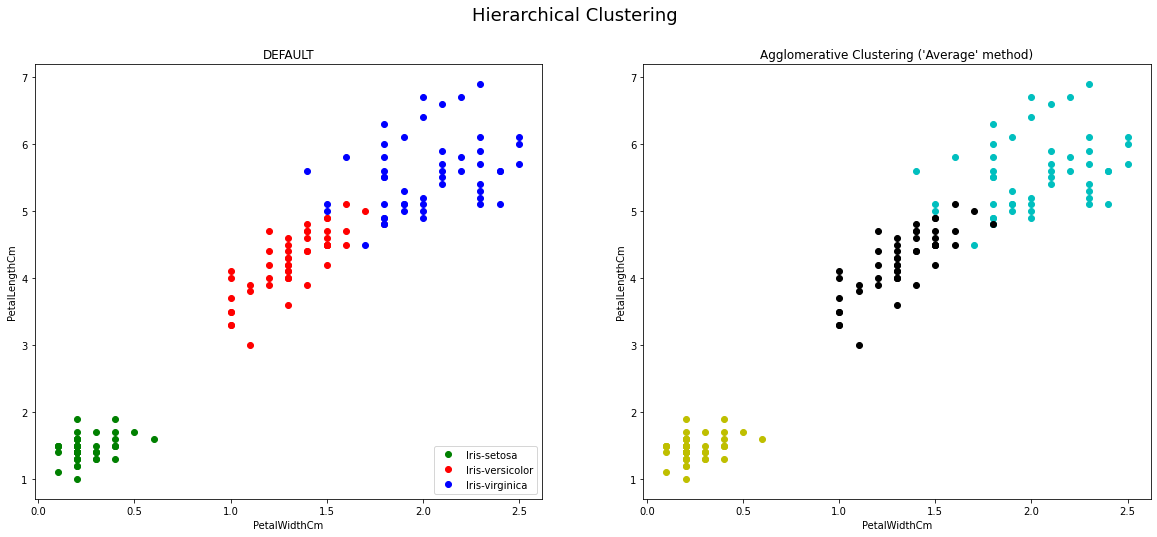

In [383]:
plot_func(df[df['hac_avg'] == 0], df[df['hac_avg'] == 1], df[df['hac_avg'] == 2], 'PetalWidthCm', 'PetalLengthCm', 'Average')

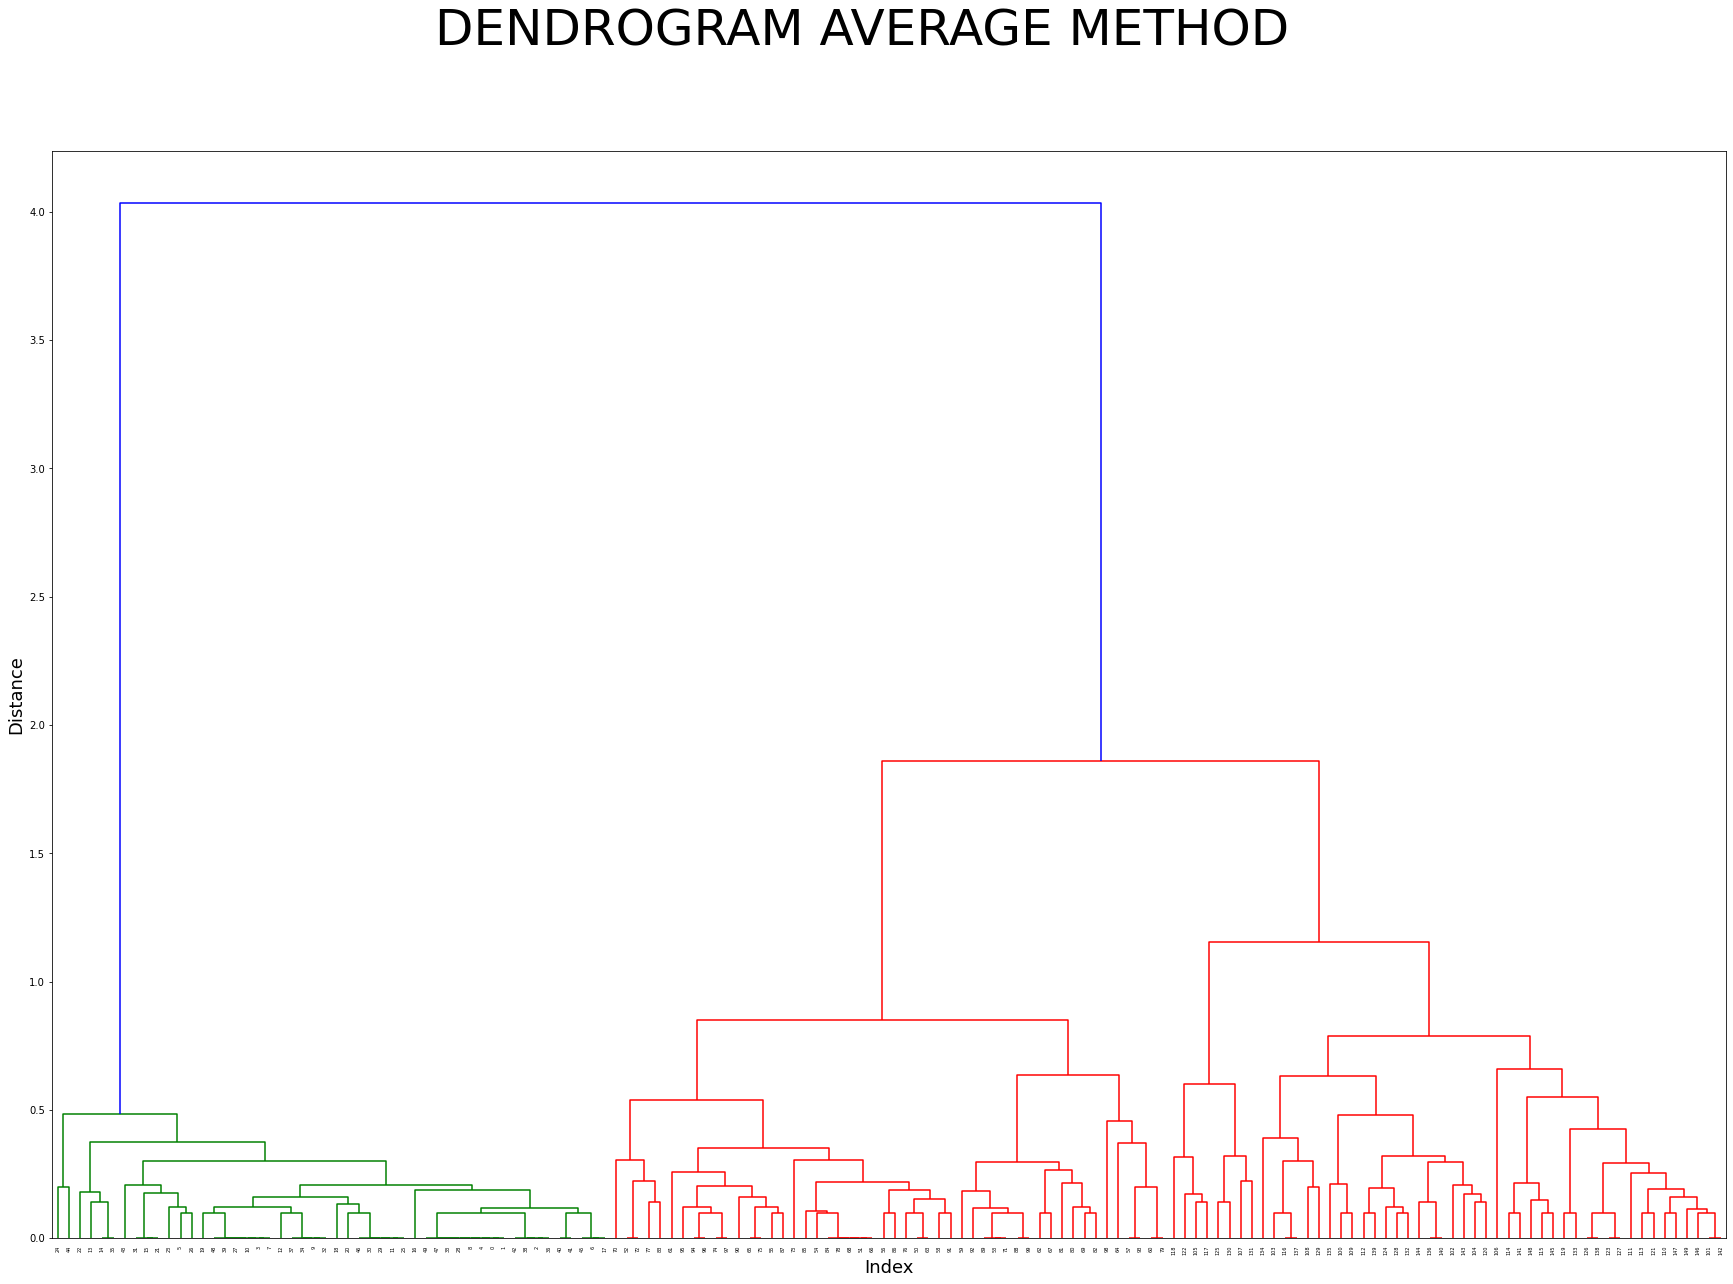

In [384]:
dend_plot_func("average")

In [385]:
print(acc('hac_avg', 0, 1))
print(acc('hac_avg', 1, 2))
print(acc('hac_avg', 2, 0))
acc_avg = (acc('hac_avg', 0, 1) + acc('hac_avg', 1, 2) + acc('hac_avg', 2, 0))/3
print('avg acc:', acc_avg)

1.0
1.0
1.0
avg acc: 1.0


# others

In [386]:
clustering1_2 = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete').fit(X)
clus1_2 = clustering1_2.labels_
df['clus1_2'] = clus1_2

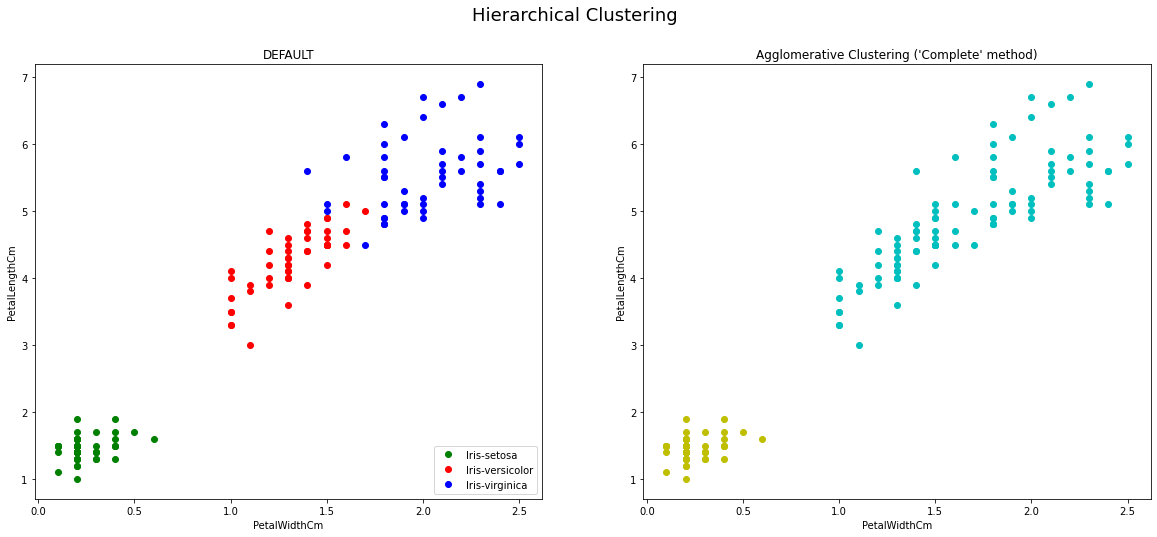

In [387]:
plot_func(df[df['clus1_2'] == 0], df[df['clus1_2'] == 1], df[df['clus1_2'] == 2], 'PetalWidthCm', 'PetalLengthCm', 'Complete')

In [388]:
clustering1_4 = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='complete').fit(X)
clus1_4 = clustering1_4.labels_
df['clus1_4'] = clus1_4

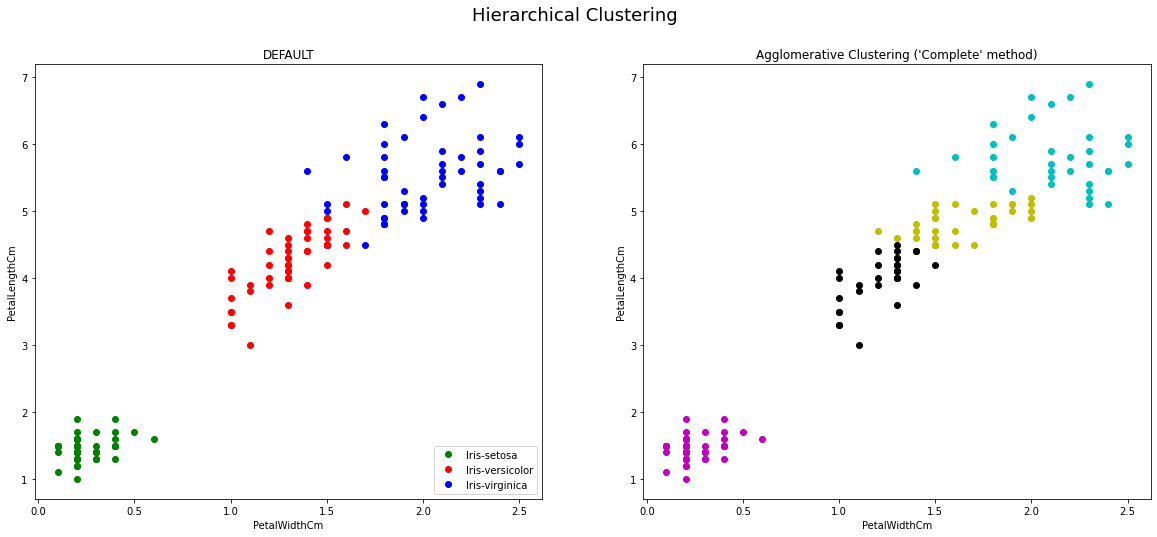

In [389]:
plt.figure(figsize=(20,8))
plt.suptitle("Hierarchical Clustering", fontsize=18)

plt.subplot(1,2,1)
plt.title('DEFAULT')
plt.xlabel('PetalWidthCm')
plt.ylabel('PetalLengthCm')
plt.plot(df[df['Species'] == 0]['PetalWidthCm'], df[df['Species'] == 0]['PetalLengthCm'], 'go', label='Iris-setosa')
plt.plot(df[df['Species'] == 1]['PetalWidthCm'], df[df['Species'] == 1]['PetalLengthCm'], 'ro', label='Iris-versicolor')
plt.plot(df[df['Species'] == 2]['PetalWidthCm'], df[df['Species'] == 2]['PetalLengthCm'], 'bo', label='Iris-virginica')
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.title("Agglomerative Clustering ('" + 'Complete' + "' method)")
plt.xlabel('PetalWidthCm')
plt.ylabel('PetalLengthCm')
plt.plot(df[df['clus1_4'] == 0]['PetalWidthCm'], df[df['clus1_4'] == 0]['PetalLengthCm'], 'co')
plt.plot(df[df['clus1_4'] == 1]['PetalWidthCm'], df[df['clus1_4'] == 1]['PetalLengthCm'], 'yo')
plt.plot(df[df['clus1_4'] == 2]['PetalWidthCm'], df[df['clus1_4'] == 2]['PetalLengthCm'], 'ko')
plt.plot(df[df['clus1_4'] == 3]['PetalWidthCm'], df[df['clus1_4'] == 3]['PetalLengthCm'], 'mo')

plt.show()